In [215]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import classificationSummary, regressionSummary
from sklearn.tree import export_graphviz
from sklearn import tree

In [216]:
fd = pd.read_csv('FlightDelays.csv')

In [217]:
fd.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [218]:
fd.shape

(2201, 13)

In [219]:
fd.dtypes

CRS_DEP_TIME      int64
CARRIER          object
DEP_TIME          int64
DEST             object
DISTANCE          int64
FL_DATE          object
FL_NUM            int64
ORIGIN           object
Weather           int64
DAY_WEEK          int64
DAY_OF_MONTH      int64
TAIL_NUM         object
Flight Status    object
dtype: object

In [220]:
fd.DAY_WEEK = fd.DAY_WEEK.astype('category')

In [221]:
#research this variable was binned
fd.CRS_DEP_TIME = pd.cut(fd.CRS_DEP_TIME, bins = 8, labels=False)

In [222]:
fd.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,4,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,5,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,3,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,5,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,2,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [223]:
#factor into m dummies
fd.CARRIER.value_counts()


DH    551
RU    408
US    404
DL    388
MQ    295
CO     94
UA     31
OH     30
Name: CARRIER, dtype: int64

In [224]:
#factor into m dummies
fd.DEST.value_counts()

LGA    1150
EWR     665
JFK     386
Name: DEST, dtype: int64

In [225]:
#factor into m dummies
fd.ORIGIN.value_counts()

DCA    1370
IAD     686
BWI     145
Name: ORIGIN, dtype: int64

In [226]:
fd['Flight Status'].value_counts()

ontime     1773
delayed     428
Name: Flight Status, dtype: int64

In [227]:
mymap = {'ontime': 0, 'delayed':1}

fd = fd.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [228]:
fd.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,4,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,0
1,5,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,0
2,3,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,0
3,5,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,0
4,2,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,0


In [229]:
fd.drop(['DAY_OF_MONTH', 'DEP_TIME', 'FL_DATE', 'TAIL_NUM'], axis = 1, inplace = True)

In [230]:
fd.shape

(2201, 9)

In [231]:
fd = pd.get_dummies(fd)

In [232]:
fd.columns

Index(['CRS_DEP_TIME', 'DISTANCE', 'FL_NUM', 'Weather', 'DAY_WEEK',
       'Flight Status', 'CARRIER_CO', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ',
       'CARRIER_OH', 'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US', 'DEST_EWR',
       'DEST_JFK', 'DEST_LGA', 'ORIGIN_BWI', 'ORIGIN_DCA', 'ORIGIN_IAD'],
      dtype='object')

In [233]:
predictors1 = ['CRS_DEP_TIME', 'DISTANCE', 'FL_NUM', 'Weather', 'DAY_WEEK',
        'CARRIER_CO', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ',
       'CARRIER_OH', 'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US', 'DEST_EWR',
       'DEST_JFK', 'DEST_LGA', 'ORIGIN_BWI', 'ORIGIN_DCA', 'ORIGIN_IAD']

outcome = ['Flight Status']

[Text(167.39999999999998, 226.5, 'Weather <= 0.5\ngini = 0.317\nsamples = 1320\nvalue = [1059, 261]'),
 Text(111.6, 135.9, 'FL_NUM <= 2257.5\ngini = 0.308\nsamples = 1308\nvalue = [1059, 249]'),
 Text(55.8, 45.29999999999998, 'gini = 0.199\nsamples = 616\nvalue = [547, 69]'),
 Text(167.39999999999998, 45.29999999999998, 'gini = 0.385\nsamples = 692\nvalue = [512, 180]'),
 Text(223.2, 135.9, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]')]

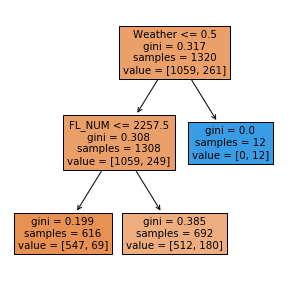

In [234]:
X = fd[predictors1]
y = fd[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

smallclassTree1 = tree.DecisionTreeClassifier(max_depth = 8, min_impurity_decrease = 0.01)
small_clf1 = smallclassTree1.fit(train_X, train_y)
plt.figure(figsize = (5, 5))
tree.plot_tree(small_clf1, feature_names = train_X.columns, filled = True)

In [235]:
classificationSummary(train_y, smallclassTree1.predict(train_X))
classificationSummary(valid_y, smallclassTree1.predict(valid_X))

Confusion Matrix (Accuracy 0.8114)

       Prediction
Actual    0    1
     0 1059    0
     1  249   12
Confusion Matrix (Accuracy 0.8331)

       Prediction
Actual   0   1
     0 714   0
     1 147  20


IF (Weather <= 0.5) AND (FL_NUM <= 2257.5) THEN Class = ontime

If you needed to fly between DCA and EWR on a Monday at 7am, you would not be able to use this tree. You would need actual departure time for flights, origin and destination variables. Yes, it is available in practice.

What information is redundant?

In [236]:
predictors2 = ['CRS_DEP_TIME', 'DISTANCE', 'FL_NUM', 'DAY_WEEK',
        'CARRIER_CO', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ',
       'CARRIER_OH', 'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US', 'DEST_EWR',
       'DEST_JFK', 'DEST_LGA', 'ORIGIN_BWI', 'ORIGIN_DCA', 'ORIGIN_IAD']

[Text(139.5, 203.85000000000002, 'FL_NUM <= 2257.5\ngini = 0.317\nsamples = 1320\nvalue = [1059, 261]'),
 Text(69.75, 67.94999999999999, 'gini = 0.206\nsamples = 619\nvalue = [547, 72]'),
 Text(209.25, 67.94999999999999, 'gini = 0.394\nsamples = 701\nvalue = [512, 189]')]

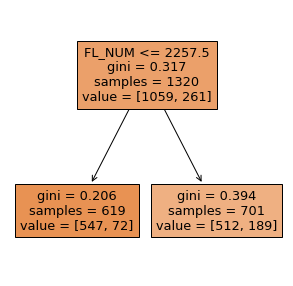

In [237]:
X = fd[predictors2]
y = fd[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

smallclassTree2 = tree.DecisionTreeClassifier(max_depth = 8, min_impurity_decrease = 0.01)
small_clf2 = smallclassTree2.fit(train_X, train_y)
plt.figure(figsize = (5, 5))
tree.plot_tree(small_clf2, feature_names = train_X.columns, filled = True)

In [238]:
classificationSummary(train_y, smallclassTree2.predict(train_X))
classificationSummary(valid_y, smallclassTree2.predict(valid_X))

Confusion Matrix (Accuracy 0.8023)

       Prediction
Actual    0    1
     0 1059    0
     1  261    0
Confusion Matrix (Accuracy 0.8104)

       Prediction
Actual   0   1
     0 714   0
     1 167   0


The small tree uses only flight number for classification.The sample size is 1,320 with gini = 0.317 and there are 1,059 samples with class 0 and 261 samples with class 1. Rule: IF FL_NUM <= 2257.5 THEN Class = 0

The rule is equivalent to ontime flight 

In [239]:
X = fd[predictors2]
y = fd[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

fullclassTree = tree.DecisionTreeClassifier()
full_clf = fullclassTree.fit(train_X, train_y)
plt.figure(figsize = (200, 200))
tree.plot_tree(full_clf, feature_names = train_X.columns, filled = True)

[Text(4439.987083031182, 10570.0, 'FL_NUM <= 2257.5\ngini = 0.317\nsamples = 1320\nvalue = [1059, 261]'),
 Text(1586.3193437273385, 9966.0, 'FL_NUM <= 831.0\ngini = 0.206\nsamples = 619\nvalue = [547, 72]'),
 Text(378.3393763596809, 9362.0, 'CRS_DEP_TIME <= 3.5\ngini = 0.465\nsamples = 68\nvalue = [43, 25]'),
 Text(210.41334300217548, 8758.0, 'DAY_WEEK <= 1.5\ngini = 0.185\nsamples = 29\nvalue = [26, 3]'),
 Text(178.04205946337925, 8154.0, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(242.78462654097171, 8154.0, 'DAY_WEEK <= 5.5\ngini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(210.41334300217548, 7550.0, 'DAY_WEEK <= 4.5\ngini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(129.4851341551849, 6946.0, 'FL_NUM <= 807.0\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(64.74256707759245, 6342.0, 'DAY_WEEK <= 3.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(32.37128353879623, 5738.0, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(97.11385061638867, 5738.0, 'gini = 0.

On examining the full-grown tree, the top three predictors are FL_NUM, CRS_DEP_TIME and DAY_WEEK

iv. Why, technically, does the small tree result in a single node? 
v. What is the disadvantage of using the top levels of the full-grown tree as opposed to the small tree? 

vi. Compare this general result to that from logistic regression in the example in Chapter 10. What are possible reasons for the classification tree’s failure to find a good predictive model? 